# 01. 訓練機器學習進行分類

## 目錄

- 在 Python 中實作感知器學習演算法
- 利用 Iris 資料集來訓練感知器(Perceptron)
- 使用 Matplotlib 繪製決策邊界
- 實作自適應梯度下降線性神經網路 (AdalineGD)

# 在 Python 中實作感知器學習演算法

## 實作感知器 

In [1]:
# 匯入 Numpy 套件
import numpy as np

# 實作感知器類別
class Perceptron:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        # LR 0.0 ~ 0.1
        self._eta = eta
        # Epoch
        self._n_iter = n_iter
        # Random seed
        self._random_state = random_state
        self._weights = np.asarray([])
        self.errors = []

    # 擬合模型
    def fit(self, x, y):
        rgen = np.random.RandomState(self._random_state)
        self._weights = rgen.normal(loc=0.0, scale=0.01, size=x.shape[1] + 1)
        self.errors = []

        for _ in range(self._n_iter):
            errors = 0
            for xi, target in zip(x, y):
                update = self._eta * (target - self.predict(xi))
                self._weights[1:] += update * xi
                self._weights[0] += update
                errors += int(update != 0.0)

            self.errors.append(errors)

        return self


    # 計算網路輸入
    def net_input(self, x):
        return np.dot(x, self._weights[1:]) + self._weights[0]

    # 預測類別標記
    def predict(self, x):
        # 當 Param 1 , 條件達成, 條件失敗
        return np.where(self.net_input(x) >= 0.0, 1, -1)

# 利用 Iris 資料集來訓練感知器(Perceptron)

使用網路中的開放資料集，來訓練感知器。

## 讀取 Iris 資料集 (網路)

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

屬性：
- Sepal length: 花萼長度 (cm)
- Sepal width: 花萼寬度 (cm)
- Petal length: 花瓣長度 (cm)
- Petal width: 花瓣寬度 (cm)

標籤：
- setosa: 山鳶尾
- versicolor: 變色鳶尾
- virginica: 維吉尼亞鳶尾


In [2]:
# 匯入 Pandas 套件
import pandas as pd

# 載入 Iris 資料集
iris_dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(iris_dataset_url,
                 header=None,
                 names=["花萼長度", "花萼寬度", "花瓣長度", "花瓣寬度", "標籤"],
                 encoding='utf-8')

# 顯示最後 n 筆資料
df.tail(n=3)

# df.head()

,花萼長度,花萼寬度,花瓣長度,花瓣寬度,標籤
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


## 讀取 Iris 的資料集 (本地)

In [4]:
# 載入本地的 Iris 資料集
df = pd.read_csv('./resources/iris_data.csv',
                 header=None,
                 names=["花萼長度", "花萼寬度", "花瓣長度", "花瓣寬度", "標籤"],
                 encoding='utf-8')

# 顯示幾筆資料
df.head()

,花萼長度,花萼寬度,花瓣長度,花瓣寬度,標籤
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 讓 MatPlotLib 可以使用中文字型

字體下載: [Noto Sans TC](https://github.com/wenwen357951/ai_course_2023/raw/main/notebooks/resources/NotoSansTC.ttf)

In [6]:
# 匯入 matplotlib 套件
import matplotlib as mlp

# 匯入 matplotlib 的字體管理器
from matplotlib.font_manager import fontManager

# 使用 fontManager 加入字體
fontManager.addfont('./resources/NotoSansTC.ttf')

# 將 matplotlib 切換字體
mlp.rc("font", family="Noto Sans TC")


## 繪製資料分布圖

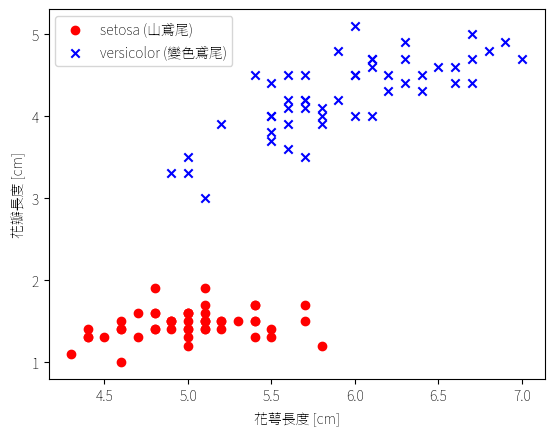

In [7]:
# 匯入 matplotlib 套件的畫布工具
import matplotlib.pyplot as plt

# 匯入 numpy 套件
import numpy as np

# 選擇 ‘setosa’ 與 ‘versicolor’
y_label = df.iloc[0:100, 4].values
y_label = np.where(y_label == 'Iris-setosa', -1, 1)

# 提取花萼長度與花瓣長度
x_train = df.iloc[0:100, [0, 2]].values

# 資料繪圖
plt.scatter(x_train[:50, 0], x_train[:50, 1],
            color='red', marker='o', label='setosa (山鳶尾)')
plt.scatter(x_train[50:100, 0], x_train[50:100, 1],
            color='blue', marker='x', label='versicolor (變色鳶尾)')

plt.xlabel('花萼長度 [cm]')
plt.ylabel('花瓣長度 [cm]')
plt.legend(loc='upper left')

plt.show()

## 模型擬合

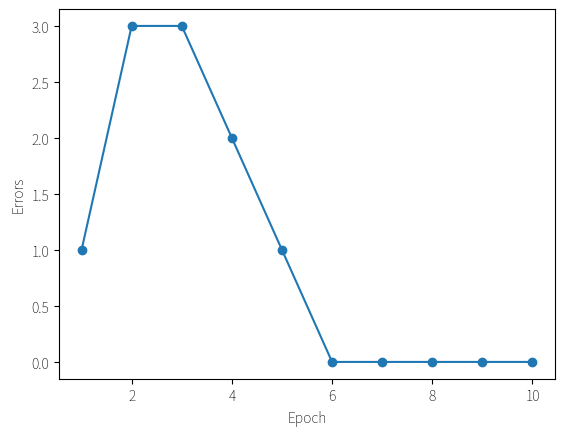

In [8]:
# 使用 Perceptron 來擬合資料
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(x_train, y_label)

# 資料繪圖
plt.plot(range(1, len(ppn.errors) + 1), ppn.errors, marker="o")
plt.xlabel('Epoch')
plt.ylabel('Errors')

plt.show()

# 使用 Matplotlib 繪製決策邊界

In [9]:
# 匯入 matplotlib 的顏色映射清單
from matplotlib.colors import ListedColormap

def plot_decision_regions(x, y, classifier, resoultion=0.02):
    # 設定標記顏色
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 繪製決策邊界
    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resoultion),
                           np.arange(x2_min, x2_max, resoultion))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, class_name in enumerate(np.unique(y)):
        plt.scatter(
            x=x[y == class_name, 0],
            y=x[y == class_name, 1],
            alpha=0.8,
            c=colors[idx],
            marker=markers[idx],
            label=class_name
        )


## 繪製決策邊界

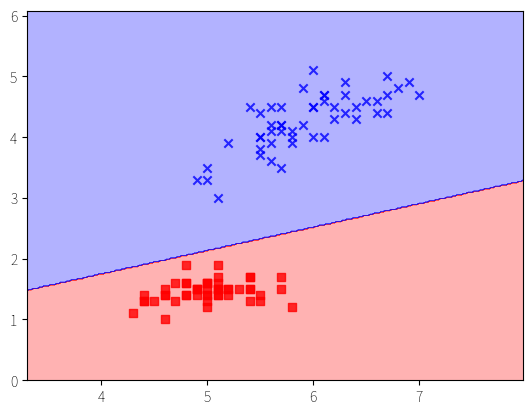

In [10]:
# 繪製決策邊界
plot_decision_regions(x_train, y_label, ppn)
plt.show()


# 實作自適應梯度下降線性神經網路 (AdalineGD)

In [11]:
# 實作 AdalineGD


## 資料標準化，特徵縮放

In [12]:
# 原始資料


In [13]:
# 標準化特徵值


## 模型擬合

## 繪製訓練過程

## 繪製決策邊界